In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scifit.solvers import linear
from scifit.interfaces import FitSolver1D

In [2]:
class Exp(FitSolver1D):
    @staticmethod
    def model(x, b):
        return np.exp(b * x[:, 0])

In [3]:
class Special(FitSolver1D):
    @staticmethod
    def model(x, b):
        return (b * x[:, 0])/(1 + b * x[:, 0])

In [12]:
class Special(FitSolver1D):
    @staticmethod
    def model(x, b):
        return (b * x[:, 0])/(1 + b * x[:, 0]**2)

In [18]:
class Special(FitSolver1D):
    @staticmethod
    def model(x, b):
        return np.abs(b * x[:, 0])

In [19]:
factory = Special #linear.ProportionalFitSolver

In [20]:
solver = factory()

In [21]:
xmin = 0
xmax = 2

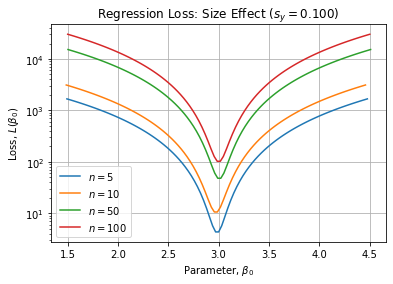

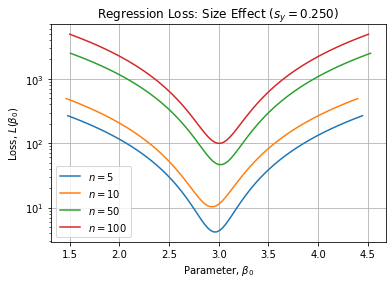

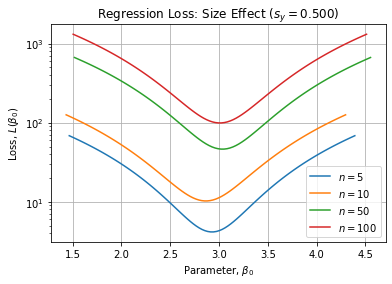

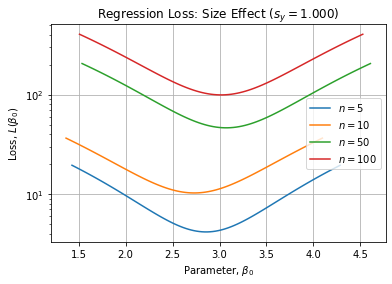

In [22]:
for i, sigma in enumerate([0.1, 0.25, 0.5, 1.0]):
    
    fig, axe = plt.subplots()
    
    for n in [5, 10, 50, 100]:
    
        data = solver.synthetic_dataset(sigma=sigma, parameters=[3], seed=1234, resolution=n, xmin=xmin, xmax=xmax)
        solution = solver.fit(data, p0=[3])
        scales = solver.parameter_scales()
        loss = solver.parametrized_loss()
        L = loss(scales)
        axe.semilogy(scales[0], L[0], label=r"$n=%d$" % n)

    axe.set_title(r"Regression Loss: Size Effect ($s_y=%.3f$)" % sigma)
    axe.set_xlabel(r"Parameter, $\beta_0$")
    axe.set_ylabel(r"Loss, $L(\beta_0)$")
    axe.legend()
    axe.grid()
    
    fig.savefig("figures/Sensitivity/LossSensitivityBySigma_{}.pdf".format(i))

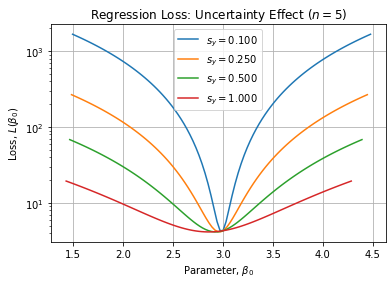

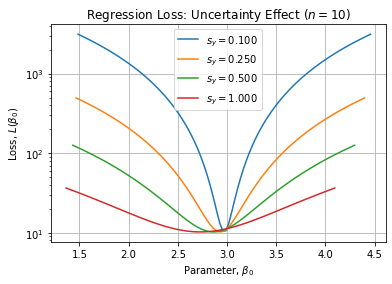

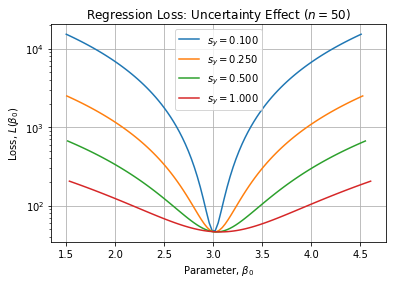

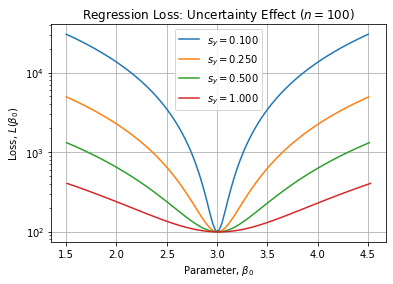

In [23]:
for i, n in enumerate([5, 10, 50, 100]):
    
    fig, axe = plt.subplots()

    for sigma in [0.1, 0.25, 0.5, 1.0]:
    
        data = solver.synthetic_dataset(sigma=sigma, parameters=[3], seed=1234, resolution=n, xmin=xmin, xmax=xmax)
        solution = solver.fit(data)
        scales = solver.parameter_scales()
        loss = solver.parametrized_loss()
        L = loss(scales)
        axe.semilogy(scales[0], L[0], label=r"$s_y=%.3f$" % sigma)

    axe.set_title(r"Regression Loss: Uncertainty Effect ($n=%d$)" % n)
    axe.set_xlabel(r"Parameter, $\beta_0$")
    axe.set_ylabel(r"Loss, $L(\beta_0)$")
    axe.legend()
    axe.grid()
    
    fig.savefig("figures/Sensitivity/LossSensitivityBySize_{}.pdf".format(i))